# Assignment Support Vector Machienes

 ## Data Understanding 

In [0]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from PIL import Image
import time
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [74]:
# reading the dataset
train_data = pd.read_csv("train.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# summary of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [76]:
# checking the dimensions
train_data.shape

(42000, 785)

In [77]:
# checking the columns
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [78]:
# breaking the dataset into subset.
# making it to 20 percent
twentypercentsubset=train_data.sample(frac=0.2, replace=True, random_state=1)
twentypercentsubset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
33003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12172,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32511,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7813,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
## checking the variance of the dataset
varince=train_data.var()
varince=varince.sort_values(ascending=False)
varince.head()

pixel406    12961.855023
pixel378    12930.525263
pixel627    12768.248426
pixel461    12750.287623
pixel434    12712.507782
dtype: float64

In [80]:
# removing the columns with very low varinace (less than or equal to  30 percent varince)
filteredvariance= train_data.loc[:, train_data.var() >=9073.2985161]
filteredvariance.head()

,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel179,pixel180,pixel181,...,pixel631,pixel632,pixel633,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,218,95,0,0,0,0,0
1,254,254,254,217,246,151,32,254,254,254,...,254,254,254,8,76,146,254,255,254,255
2,9,254,254,8,0,0,0,0,9,254,...,184,0,0,0,0,0,63,254,254,62
3,0,0,0,0,0,9,77,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,253,253,253,253,253,253,114,253,253,253,...,253,253,253,129,208,253,253,253,253,159


In [81]:
# checking dimensions for the subset twentypercentsubset
twentypercentsubset.shape

(8400, 785)

In [82]:
# checking dimensions for the dataset filteredvariance
filteredvariance.shape

(42000, 217)

In [83]:
# checking the unique values in label column
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


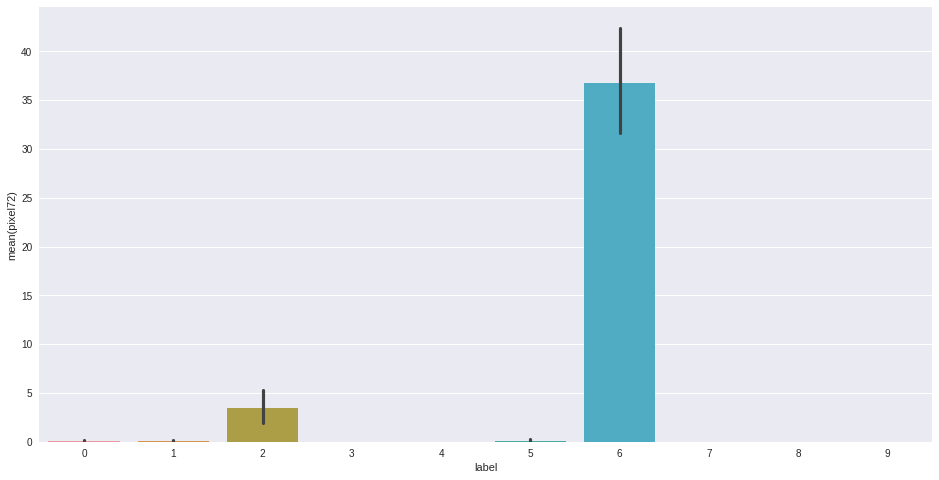

In [84]:
# basic plots: How do various attributes vary with the letters

plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='pixel72', 
            data=twentypercentsubset, 
            order=order)

In [85]:
# grouping by label column
twentypercentsubset_means = twentypercentsubset.groupby('label').mean()
twentypercentsubset_means

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.317460,0.500000,0.239229,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## Data Preparation

In [87]:
# average feature values
round(twentypercentsubset.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.00
pixel14     0.00
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.00
pixel762    0.02
pixel763    0.09
pixel764    0.06
pixel765    0.11
pixel766    0.30
pixel767    0.35
pixel768    0.42
pixel769    0.47
pixel770    0.78
pixel771    0.79
pixel772    0.59
pixel773    0.26
pixel774    0.16
pixel775    0.06
pixel776    0.06
pixel777    0.03
pixel778    0.01
pixel779    0.00
pixel780    0.00
pixel781    0.

In [0]:
#@title Initially i build the model by taking 20 percent of the data directly from the train data given but found the accuracy to be less than the value which we are achieving after removing the low variance columns ,hence i have commented this code here.


In [0]:

# # # splitting into X and y
# X = twentypercentsubset.drop("label", axis = 1)
# y = twentypercentsubset['label']

In [0]:
#@title Here while using the whole train data set we get a high accuracy but computation time is very large and hence i also commented this split.


In [0]:

# # # splitting into X and y
# X = train_data.drop("label", axis = 1)
# y = train_data['label']

In [0]:
#@title Finally using the filteredvariance dataset where i filtered the low variance columns and used for further analysis.


In [0]:
# # splitting into X and y
X = filteredvariance
y = train_data['label']

In [91]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


## Model building 

In [92]:
# linear model
start=time.time()


model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)
end = time. time()
print(end - start)

166.95113801956177


In [93]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9026190476190477 

[[1153    0    9    5    1   23   15    0    7    0]
 [   0 1386   13    6    0    4    0    2    8    3]
 [  17   21 1090   14   18   12   37   18   20   11]
 [  13    6   22 1144    3   51    4    8   17   16]
 [   6    5   12    2 1129    4    8    7    4   32]
 [  35   12   24   74   11  918   22    3   15    7]
 [  10    5   27    9   15   30 1142    0    4    0]
 [   5    2   26    9   16    2    1 1226    5   23]
 [   9   18   29   38    9   47    9    4 1050   14]
 [   5    8   19   27   55    6    0   41   13 1135]]


In [94]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [95]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.972936507936508 

[[1201    0    3    1    1    2    3    0    2    0]
 [   0 1403    6    3    2    1    0    3    3    1]
 [   9    3 1212    4    4    1    2   14    8    1]
 [   3    0   18 1224    1   17    5    3    5    8]
 [   2    0    3    0 1187    0    3    1    3   10]
 [   3    0    1   13    3 1091    5    0    2    3]
 [   5    1    2    0    1    5 1228    0    0    0]
 [   2    2   15    2   11    0    0 1273    1    9]
 [   2    2    7    7    4    2    3    1 1195    4]
 [   6    3    4   11   20    2    1    8    9 1245]]


## Grid Search: Hyperparameter Tuning Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [0]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [0]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [0]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [47]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The score is 0.9569654703180813 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [66]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9793650793650793 

[[1206    0    2    1    1    0    1    0    2    0]
 [   0 1401    8    3    3    1    0    3    3    0]
 [   5    2 1227    3    1    3    2    8    7    0]
 [   1    0   13 1244    0   11    5    2    5    3]
 [   1    0    2    0 1196    0    3    0    2    5]
 [   1    1    0   12    2 1091    6    0    3    5]
 [   4    1    1    0    1    3 1232    0    0    0]
 [   1    3    7    2   10    0    0 1286    0    6]
 [   0    1    6    7    1    0    2    1 1205    4]
 [   5    2    3   10   20    3    1    5    8 1252]] 



In [96]:

#  polynomial model

polynomial_model = SVC(kernel='poly',degree=2)

# fit
polynomial_model.fit(X_train, y_train)

# predict
y_pred =polynomial_model.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [97]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9719047619047619 

[[1199    0    4    2    1    1    2    0    2    2]
 [   2 1399    8    0    7    1    1    3    1    0]
 [   7    2 1216    3    8    1    2   12    3    4]
 [   2    0   19 1220    1   24    3    4    6    5]
 [   3    2    3    2 1190    0    4    0    0    5]
 [   1    0    2   13    0 1090    5    1    5    4]
 [   7    0    2    1    1    6 1222    0    3    0]
 [   3    2   14    1   10    1    0 1271    1   12]
 [   2    2   12    8    1    3    3    1 1193    2]
 [   6    4    5    9   15    5    2    9    8 1246]]


Text(0.5, 1.0, 'Digit 4')

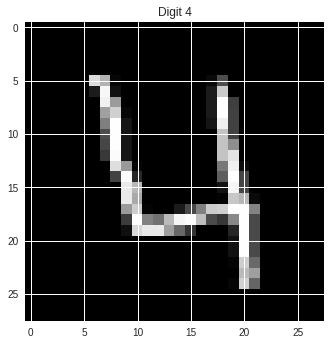

In [98]:
# Plotting some samples 

four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

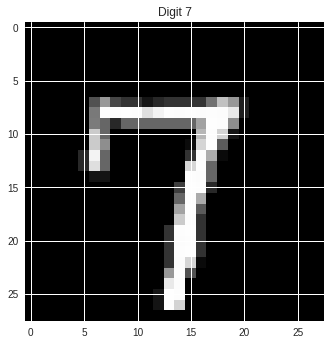

In [99]:

# for digits 7
seven = train_data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

In [0]:
#@title The aacuracy for twenty percent of the data is more but at the same time the computation time is very high and accuracy for the dataset with low variance columns is low as compared to the filtereddataset which i used for computation , as this dataset does not contains low variance columns and i have also filtered the rows according to each label value
